Data diri
- Nama     = Mohammad Habibul Akhyar
- username = habkhyar
- email    = khyar075@gmail.com

In [1]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [2]:
import os, random, shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from IPython.display import Image, display
from keras.preprocessing import image
import numpy as np

In [3]:
# Dataset directory
dataset_dir = 'rockpaperscissors'
categories = [
    "paper",
    "rock",
    "scissors"
]

for category in categories:
    category_dir = os.path.join(dataset_dir, category)

    # Membuat folder train dan validasi
    train_dir = os.path.join(dataset_dir, 'train', category)
    val_dir = os.path.join(dataset_dir, 'validation', category)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    images = os.listdir(category_dir)

    # Menggunakan train_test_split untuk membagi data dengan test 40%
    train_images, val_images = train_test_split(images, test_size=0.4, random_state=42)

    # Pindahkan gambar ke direktori train dan validasi
    for img in train_images:
        src_path = os.path.join(category_dir, img)
        dest_path = os.path.join(train_dir, img)
        shutil.copy(src_path, dest_path)

    for img in val_images:
        src_path = os.path.join(category_dir, img)
        dest_path = os.path.join(val_dir, img)
        shutil.copy(src_path, dest_path)

In [4]:
# Data augmentasi untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rescaling untuk validasi
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# gambar dimensi, epoch dan batchsize
img_width, img_height = 150, 150
epochs = 5
batch_size = 32

In [6]:
train_generator = train_datagen.flow_from_directory(
    'rockpaperscissors/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical' # Mereturnkan 2D
)

validation_generator = val_datagen.flow_from_directory(
    'rockpaperscissors/validation',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [7]:
# Membuat model
model = Sequential()

# Menambahkan layer convolusi dan max pooling
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Mengubah array multidimensi jadi single array
model.add(Flatten())

# Menambah layer dense
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # untuk mencegah overfitting
model.add(Dense(3, activation='softmax'))

# Menggunakan optimizer adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Training model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5
41/41 [==============================] - 113s 3s/step - loss: 0.9008 - accuracy: 0.5694 - val_loss: 0.3632 - val_accuracy: 0.9005
Epoch 2/5
41/41 [==============================] - 107s 3s/step - loss: 0.3627 - accuracy: 0.8750 - val_loss: 0.2459 - val_accuracy: 0.9167
Epoch 3/5
41/41 [==============================] - 113s 3s/step - loss: 0.2637 - accuracy: 0.9085 - val_loss: 0.1659 - val_accuracy: 0.9549
Epoch 4/5
41/41 [==============================] - 111s 3s/step - loss: 0.2040 - accuracy: 0.9306 - val_loss: 0.1358 - val_accuracy: 0.9583
Epoch 5/5
41/41 [==============================] - 115s 3s/step - loss: 0.1637 - accuracy: 0.9367 - val_loss: 0.1095 - val_accuracy: 0.9688


In [9]:
# Evaluasi model
score = model.evaluate(validation_generator, verbose=1)

# Hasil evaluasi
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

28/28 [==============================] - 18s 637ms/step - loss: 0.1081 - accuracy: 0.9692
Test Loss: 0.10806180536746979
Test Accuracy: 0.9691780805587769


Saving fiivFS9iUjynQIB5.png to fiivFS9iUjynQIB5.png
1/1 [==============================] - 0s 38ms/step


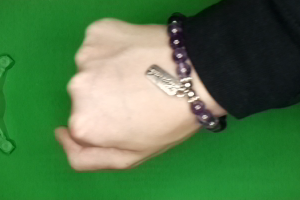

Hasil kategori =  rock


In [11]:
# Upload gambar
uploaded = files.upload()
uploaded_image_path = list(uploaded.keys())[0]
img = image.load_img(uploaded_image_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
prediksi = model.predict(img)
prediksi_label = categories[np.argmax(prediksi)]
display(Image(uploaded_image_path))
print("Hasil kategori = ", prediksi_label)